## Final Models 

In [2]:
# import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
# read in csv files into pd df
month1 = pd.read_csv('Output/Vendor_M1_D.del')
month2 = pd.read_csv('Output/Vendor_M2_D.del')
# month3 = pd.read_csv('Output/Vendor_M3_D.del')
# month4 = pd.read_csv('Output/Vendor_M4_D.del')
# month5 = pd.read_csv('Output/Vendor_M5_D.del')
# month6 = pd.read_csv('Output/Vendor_M6_D.del')
# month7 = pd.read_csv('Output/Vendor_M7_D.del')
# month8 = pd.read_csv('Output/Vendor_M8_D.del')
# month9 = pd.read_csv('Output/Vendor_M9_D.del')
# month10 = pd.read_csv('Output/Vendor_M10_D.del')
# month11 = pd.read_csv('Output/Vendor_M11_D.del')
# month12 = pd.read_csv('Output/Vendor_M12_D.del')
month1.head()

,Amount,Date_of_Spend,Distance,Latitude_Recipient,Latitude_Vendor,Longitude_Recipient,Longitude_Vendor,Recipient_NUMBER,Vendor_NUMBER,FRAUD_INDICATOR
0,197,01/24/2018,9.547736,36.081448,36.097426,-79.267657,-79.437501,13,10,0
1,44,01/07/2018,1.374235,36.091285,36.084506,-79.518872,-79.495735,14,4,0
2,318,01/23/2018,105.631561,36.018797,36.050240,-79.433974,-81.324046,15,3,1
3,334,01/15/2018,100.859056,36.091285,36.050240,-79.518872,-81.324046,16,3,1
4,333,01/04/2018,30.104216,36.125949,35.830217,-79.437330,-79.041980,17,2,1


## Multiple Linear Regression

(8409, 2)
(8409, 1)
Training Score: 0.6604439764496223
Testing Score: 0.6811098040125543
R2 Score: 0.6656073503174238


Text(0.5, 1.0, 'Residual Plot')

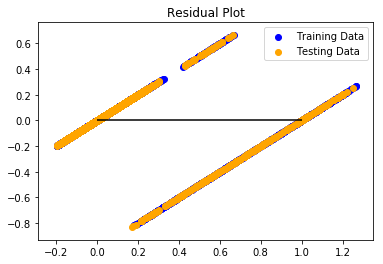

In [21]:
# import linear dataset with features
n_features = 3
X = month1[["Distance", "Amount"]]
y = month1["FRAUD_INDICATOR"].values.reshape(-1,1)
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# model
model = LinearRegression()

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

score = model.score(X, y)
print(f"R2 Score: {score}")

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

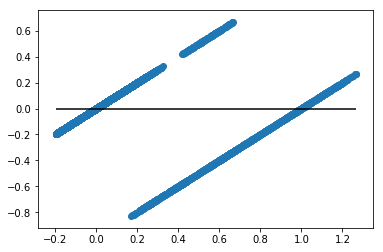

In [22]:
# residuals
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()